# 10.1. Analyzing the frequency components of a signal with a Fast Fourier Transform

In [1]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df0 = pd.read_csv('https://github.com/ipython-books/'
                  'cookbook-2nd-data/blob/master/'
                  'weather.csv?raw=true',
                  na_values=(-9999),
                  parse_dates=['DATE'])

In [3]:
df = df0[df0['DATE'] >= '19940101']

In [4]:
df.head()

,STATION,DATE,PRCP,TMAX,TMIN
365,GHCND:FR013055001,1994-01-01,0.0,104.0,72.0
366,GHCND:FR013055001,1994-01-02,4.0,128.0,49.0
367,GHCND:FR013055001,1994-01-03,0.0,160.0,87.0
368,GHCND:FR013055001,1994-01-04,0.0,118.0,83.0
369,GHCND:FR013055001,1994-01-05,34.0,133.0,55.0


In [5]:
df_avg = df.dropna().groupby('DATE').mean()

In [6]:
df_avg.head()

,PRCP,TMAX,TMIN
DATE,,,
1994-01-01,178.666667,127.388889,70.333333
1994-01-02,122.000000,152.421053,81.736842
1994-01-03,277.333333,157.666667,95.555556
1994-01-04,177.105263,142.210526,95.684211
1994-01-05,117.944444,130.222222,75.444444


In [9]:
date = pd.to_datetime(df_avg.index)
temp = (df_avg['TMAX'] + df_avg['TMIN']) / 20.
N = len(temp)

Text(0, 0.5, 'Mean temperature')

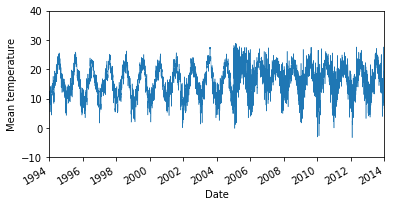

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
temp.plot(ax=ax, lw=.5)
ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')

In [11]:
temp_fft = sp.fftpack.fft(temp)

In [12]:
temp_psd = np.abs(temp_fft) ** 2

In [13]:
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 365)

In [14]:
i = fftfreq > 0

Text(0, 0.5, 'PSD (dB)')

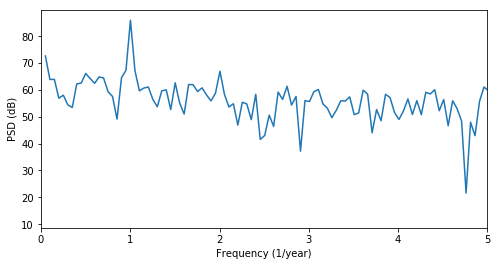

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [16]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 1.1] = 0

In [17]:
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

Text(0, 0.5, 'Mean temperature')

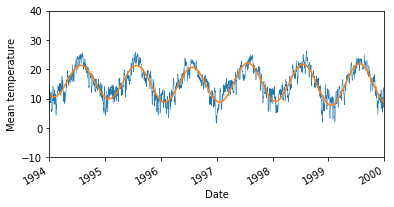

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
ax.set_xlim(datetime.date(1994, 1, 1),
            datetime.date(2000, 1, 1))
ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('Mean temperature')